In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score


In [2]:
data = pd.read_excel('./ML_vui_test.xlsx')
pd.options.display.float_format = '{:,.4f}'.format
data.head()
#data.loc[pd.notnull(data.P_BIRTHDAY)].head()

,GENDER,P_BIRTHDAY,Order,Items,GMV,AIV,AOV,Last Purchase,Num_of_cate,Check_mua_TP
0,NaN,NaN,1,1,"20,000.0000","20,000.0000","20,000.0000",344,1,0
1,NaN,NaN,1,1,"20,000.0000","20,000.0000","20,000.0000",344,1,0
2,NaN,NaN,1,1,"20,000.0000","20,000.0000","20,000.0000",302,1,0
3,NaN,NaN,1,1,"20,000.0000","20,000.0000","20,000.0000",350,1,0
4,NaN,NaN,1,1,"20,000.0000","20,000.0000","20,000.0000",303,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91783 entries, 0 to 91782
Data columns (total 10 columns):
GENDER           58408 non-null object
P_BIRTHDAY       50316 non-null object
Order            91783 non-null int64
Items            91783 non-null int64
GMV              91783 non-null float64
AIV              91783 non-null float64
AOV              91783 non-null float64
Last Purchase    91783 non-null int64
Num_of_cate      91783 non-null int64
Check_mua_TP     91783 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 7.0+ MB


In [4]:
data.describe()

,Order,Items,GMV,AIV,AOV,Last Purchase,Num_of_cate,Check_mua_TP
count,"91,783.0000","91,783.0000","91,783.0000","91,783.0000","91,783.0000","91,783.0000","91,783.0000","91,783.0000"
mean,4.1414,12.3089,"9,716,691.0343","2,112,440.9535","2,560,145.3998",476.3802,1.4358,0.0835
std,10.7965,91.7215,"28,344,692.7903","4,166,307.4060","4,570,577.5534",328.7154,1.0813,0.2766
min,1.0000,1.0000,2.0000,1.0000,2.0000,0.0000,1.0000,0.0000
25%,1.0000,1.0000,"169,000.0000","75,403.3900","100,000.0000",242.0000,1.0000,0.0000
50%,1.0000,2.0000,"1,200,000.0000","340,000.0000","530,326.4706",356.0000,1.0000,0.0000
75%,3.0000,5.0000,"7,249,000.0000","2,245,000.0000","2,890,000.0000",712.0000,1.0000,0.0000
max,731.0000,"12,308.0000","2,534,473,655.0000","68,237,500.0000","186,419,000.0000","1,475.0000",8.0000,1.0000


In [11]:
dataClone = data.loc[data['GMV']<=9716691+3*28344692]

In [12]:
data['GENDER'].value_counts()

MALE        37387
UNDEFINE    33397
FEMALE      20999
Name: GENDER, dtype: int64

In [5]:
data['GENDER'].fillna('UNDEFINE',inplace=True)
#data['P_BIRTHDAY'].fillna('2010-01-01 00:00:00',inplace=True)
data['P_BIRTHDAY'].fillna('2010-01-01 00:00:00',inplace=True)

In [6]:
data['P_BIRTHDAY'] = pd.to_datetime(data['P_BIRTHDAY'])

In [7]:
data['Age'] = pd.datetime.today().year - data['P_BIRTHDAY'].dt.year

In [8]:
data = data.drop(['P_BIRTHDAY'], axis=1)
data.head()

,GENDER,Order,Items,GMV,AIV,AOV,Last Purchase,Num_of_cate,Check_mua_TP,Age
0,UNDEFINE,1,1,"20,000.0000","20,000.0000","20,000.0000",344,1,0,9
1,UNDEFINE,1,1,"20,000.0000","20,000.0000","20,000.0000",344,1,0,9
2,UNDEFINE,1,1,"20,000.0000","20,000.0000","20,000.0000",302,1,0,9
3,UNDEFINE,1,1,"20,000.0000","20,000.0000","20,000.0000",350,1,0,9
4,UNDEFINE,1,1,"20,000.0000","20,000.0000","20,000.0000",303,1,0,9


In [13]:
data['Check_mua_TP'].value_counts()

0    84121
1     7662
Name: Check_mua_TP, dtype: int64

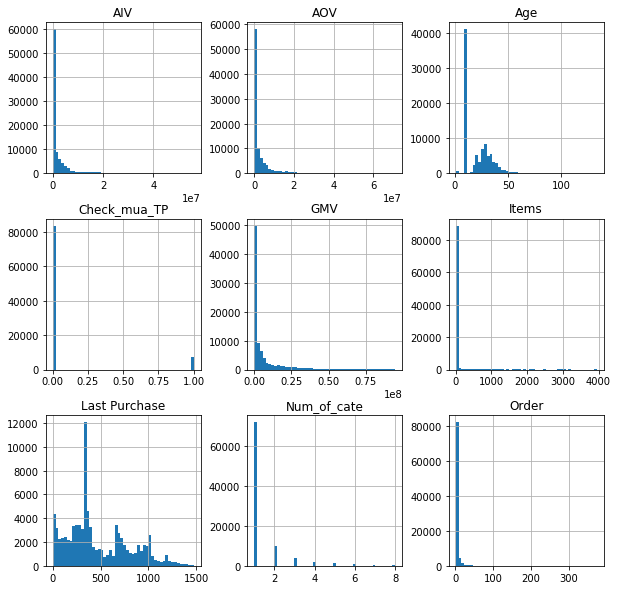

In [14]:
dataClone.hist(bins=50, figsize=(10,10)) #mean + 3 * std
plt.show()

In [15]:
corrMatrix = data.corr()

In [16]:
corrMatrix["Check_mua_TP"].sort_values(ascending=False)

Check_mua_TP     1.0000
Num_of_cate      0.6829
Order            0.3768
GMV              0.2816
Items            0.2650
Age              0.1303
AOV              0.0116
Last Purchase    0.0041
AIV             -0.0576
Name: Check_mua_TP, dtype: float64

In [17]:
X = data.drop(['Check_mua_TP'], axis = 1)
Y = data['Check_mua_TP'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2) #, random_state=42

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73426, 9)
(18357, 9)
(73426,)
(18357,)


In [22]:
print('Y_train: ')
print(y_train.value_counts())
print('Y_test:')
print(y_test.value_counts())

Y_train: 
0    67295
1     6131
Name: Check_mua_TP, dtype: int64
Y_test:
0    16826
1     1531
Name: Check_mua_TP, dtype: int64


In [23]:
X_train.head()

,GENDER,Order,Items,GMV,AIV,AOV,Last Purchase,Num_of_cate,Age
84036,FEMALE,1,1,"20,000.0000","20,000.0000","20,000.0000",302,1,19
67954,FEMALE,2,2,"2,000,000.0000","1,000,000.0000","1,000,000.0000",134,1,23
40226,UNDEFINE,5,10,"2,000,000.0000","200,000.0000","400,000.0000",36,1,9
8982,UNDEFINE,1,1,"2,390,000.0000","2,390,000.0000","2,390,000.0000",992,1,9
51330,MALE,7,11,"30,788,100.0000","2,798,918.1818","4,398,300.0000",153,3,32


In [24]:
X_num = X_train.drop("GENDER", axis = 1)

In [30]:
gender = X_train[["GENDER"]]

In [31]:
gender.head(10)

,GENDER
84036,FEMALE
67954,FEMALE
40226,UNDEFINE
8982,UNDEFINE
51330,MALE
10995,UNDEFINE
20799,UNDEFINE
27411,UNDEFINE
66866,FEMALE
86268,MALE


In [33]:
set(gender["GENDER"])

{'FEMALE', 'MALE', 'UNDEFINE'}

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lblEnc = LabelEncoder()
ohEnc = OneHotEncoder()

In [48]:
lblEnc.fit(gender)
genderLbl = lblEnc.transform(gender)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
genderLbl

array([0, 0, 2, ..., 2, 2, 1])

In [ ]:
ohEnc.fit(genderLbl)
genderOnehot = ohEnc.transform(genderLbl)

In [50]:
from sklearn.preprocessing import LabelBinarizer

genderEncoder = LabelBinarizer()
genderOnehot = genderEncoder.fit_transform(gender)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numPipeline = Pipeline([
       # ('imputer', SimpleImputer(strategy="median")),
       # ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
X_NumTr = numPipeline.fit_transform(X_num)

In [53]:
from sklearn.compose import ColumnTransformer 
numAttribs = list(X_num)
catAttribs = ["GENDER"]
fullPipeline = ColumnTransformer([
     ("num", numPipeline, numAttribs),
     ("cat", LabelBinarizer(), catAttribs),
 ])
dataPrepared_X_train = fullPipeline.fit_transform(X_train)
dataPrepared_X_test = fullPipeline.fit_transform(X_test)


ModuleNotFoundError: No module named 'sklearn.compose'

In [206]:
dataPrepared_X_train

array([[ 0.26552335, -0.04445053, -0.17544157, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19837646, -0.09724869, -0.33163047, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29115642, -0.11836796, -0.33119163, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.01281654, -0.07612943,  1.00476919, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.10054301,  0.04002654, -0.27825333, ...,  0.        ,
         1.        ,  0.        ],
       [-0.29115642, -0.11836796, -0.23889788, ...,  0.        ,
         0.        ,  1.        ]])

In [207]:
from sklearn.linear_model import LogisticRegression 

logReg = LogisticRegression(fit_intercept = False) #C = 5, penalty='l2'
logReg.fit(dataPrepared_X_train, y_train)

/Users/funny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
parameters = logReg.coef_
predicted_classes = logReg.predict(dataPrepared_X_test)
accuracy = accuracy_score(predicted_classes,y_test)
confusion_matrix = confusion_matrix(predicted_classes,y_test)


In [209]:
print('The accuracy score is {}'.format(accuracy))
print("confusion_matrix")
print(confusion_matrix)

The accuracy score is 0.9449801165767827
confusion_matrix
[[16537   722]
 [  288   810]]


In [210]:
logReg.predict(dataPrepared_X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [211]:
from sklearn.svm import SVC

In [212]:
clf = SVC(kernel = 'rbf')
clf.fit(dataPrepared_X_train, y_train)


/Users/funny/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [221]:
predict_svm = clf.predict(dataPrepared_X_test)
accuracy_SVM = accuracy_score(predict_svm,y_test)
print('The accuracy score is {}'.format(accuracy_SVM))
confusion_matrix_SVM = confusion_matrix(predict_svm,y_test)
print(confusion_matrix_SVM)

The accuracy score is 0.953696137713134
[[16630   655]
 [  195   877]]


In [217]:
sum(predict_svm)

1072

In [218]:
from sklearn.linear_model import SGDClassifier 

from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score



In [219]:
model = RandomForestClassifier( n_estimators=200, max_leaf_nodes=8, oob_score=True)

model.fit(dataPrepared_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
predict_rf = model.predict(dataPrepared_X_test)
accuracy_rf = accuracy_score(predict_rf,y_test)
print('The accuracy score is {}'.format(accuracy_rf))
confusion_matrix_rf = confusion_matrix(y_test,predict_rf)
print(confusion_matrix_rf)
auc_rf = auc(predict_rf,y_test)
print(auc_rf)



The accuracy score is 0.9478128234460969
[[16598   227]
 [  731   801]]


ValueError: x is neither increasing nor decreasing : [0 0 0 ... 0 0 0].